In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
img1 = cv2.imread("/content/img1.jpg")[:,:,::-1]
img2 = cv2.imread("/content/img2.webp")[:,:,::-1]
img3 = cv2.imread("/content/img3.jpg")[:,:,::-1]

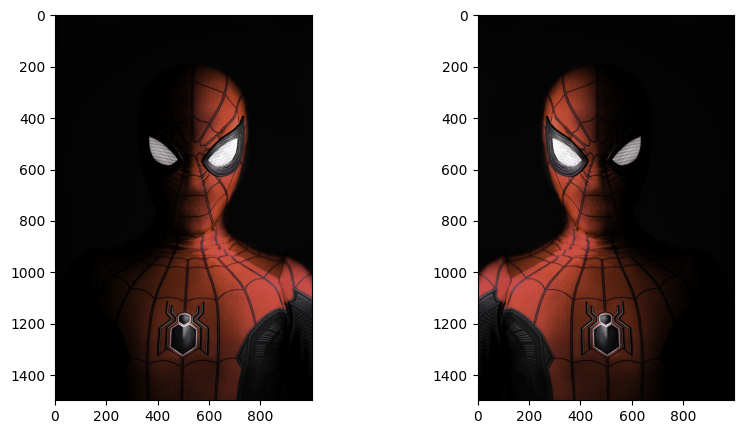

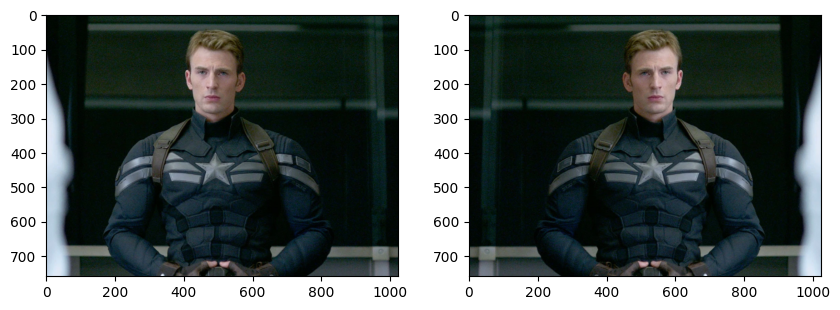

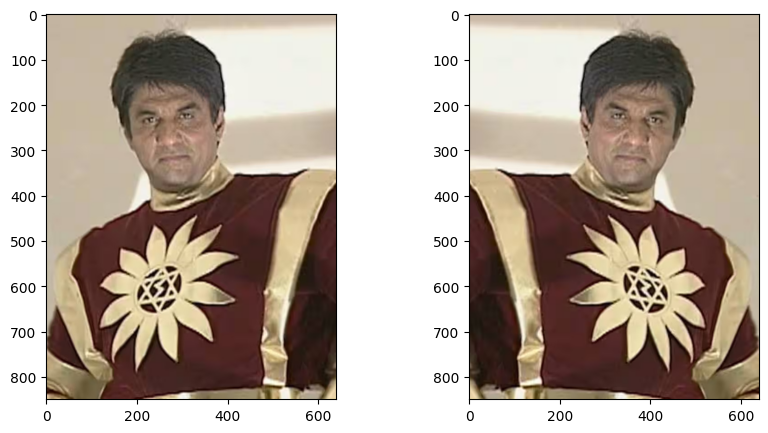

In [ ]:
#Flipping Image
new_img1 = img1[:, ::-1, :]
new_img2 = img2[:, ::-1, :]
new_img3 = img3[:, ::-1, :]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img1)
axes[1].imshow(new_img1)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img2)
axes[1].imshow(new_img2)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img3)
axes[1].imshow(new_img3)

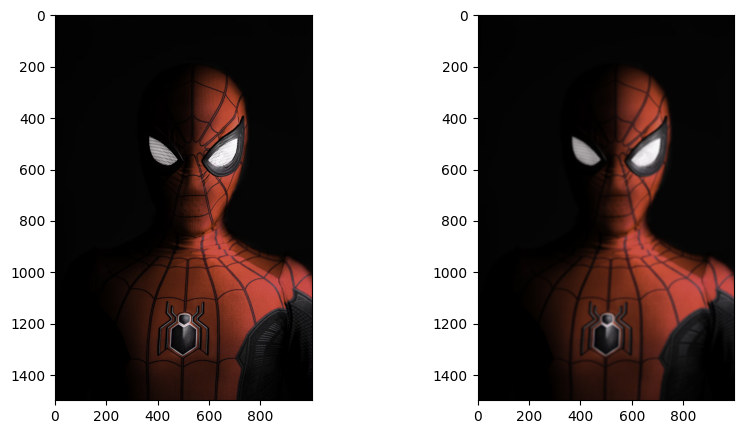

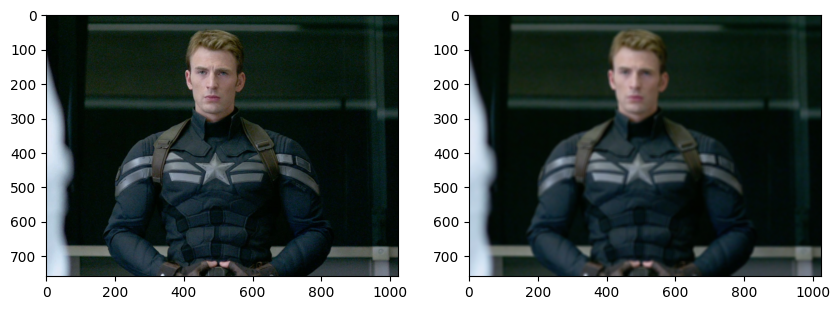

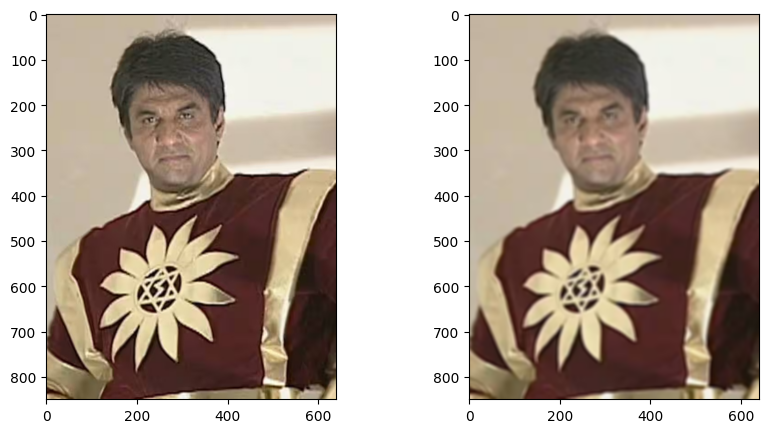

In [ ]:
#Gaussian Blur
new_img1 = cv2.GaussianBlur(img1, (9, 9), 100)
new_img2 = cv2.GaussianBlur(img2, (9, 9), 200)
new_img3 = cv2.GaussianBlur(img3, (9, 9), 300)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img1)
axes[1].imshow(new_img1)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img2)
axes[1].imshow(new_img2)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img3)
axes[1].imshow(new_img3)

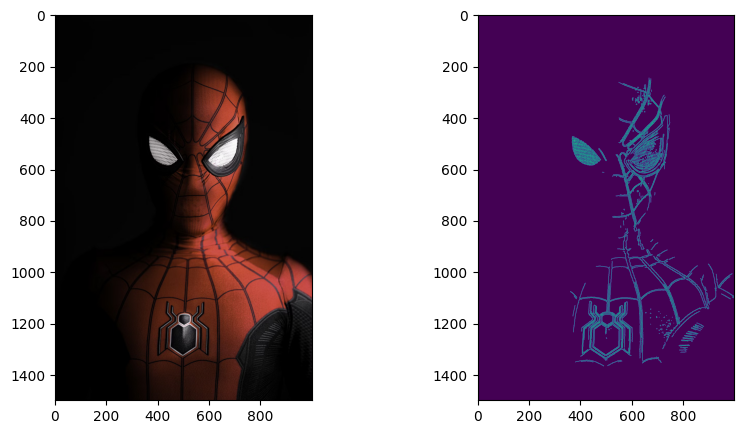

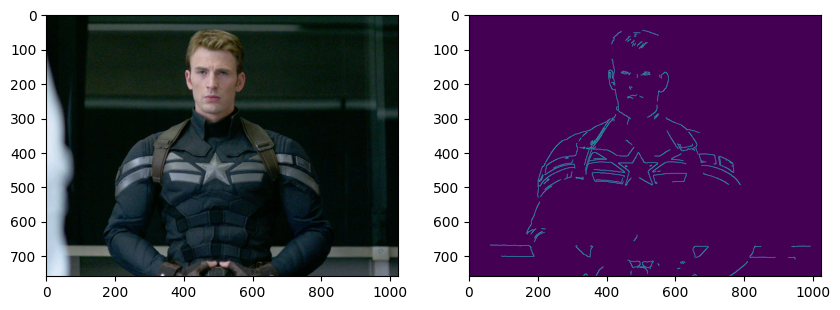

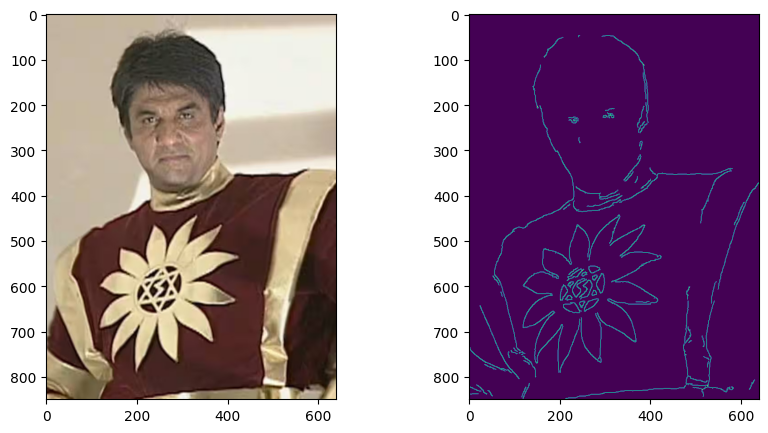

In [ ]:
#Edge Detection
new_img1 = cv2.Canny(img1, 150, 250)
new_img2 = cv2.Canny(img2, 150, 250)
new_img3 = cv2.Canny(img3, 150, 250)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img1)
axes[1].imshow(new_img1)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img2)
axes[1].imshow(new_img2)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img3)
axes[1].imshow(new_img3)

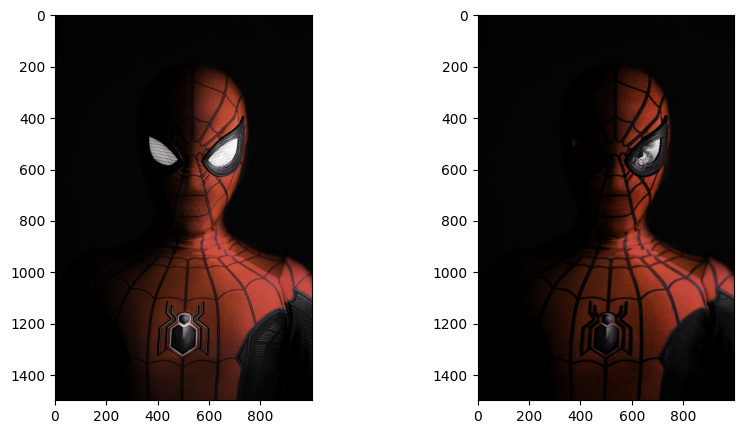

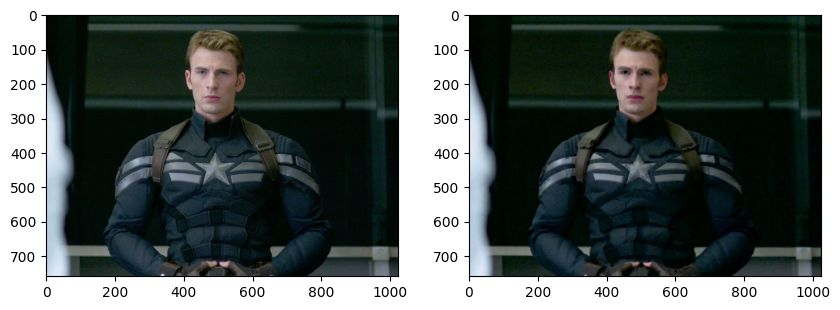

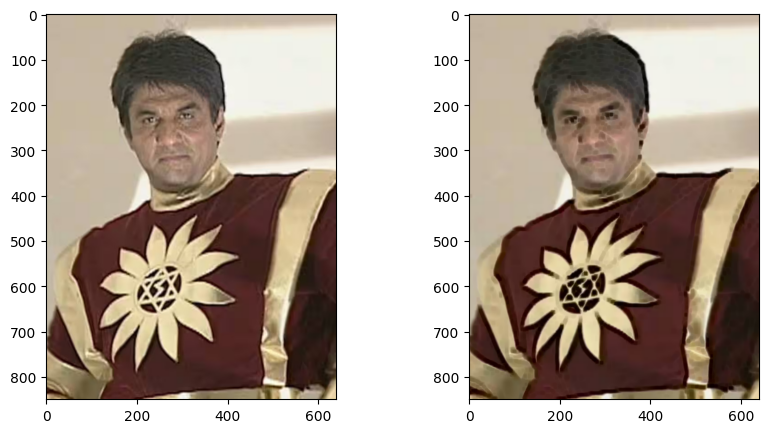

In [ ]:
#Image Erosion
kernel = np.ones((5, 5))

new_img1 = cv2.erode(img1, kernel)
new_img2 = cv2.erode(img2, kernel)
new_img3 = cv2.erode(img3, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img1)
axes[1].imshow(new_img1)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img2)
axes[1].imshow(new_img2)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img3)
axes[1].imshow(new_img3)

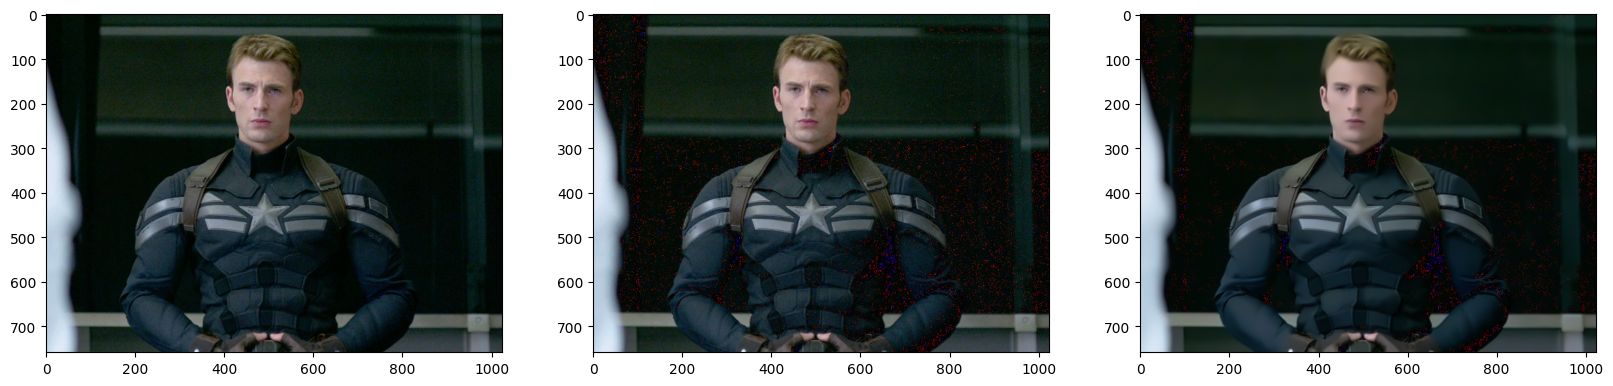

In [ ]:
#Noising of Image
noise = np.random.normal(scale=1, size=new_img2.shape)
new_img2 = np.array(img2)
noisy2 = np.uint8(new_img2 + noise)

# Denoising of Image
dst2 = cv2.fastNlMeansDenoisingColored(noisy2, None, 9, 9, 15, 30)

fig, axes = plt.subplots(1, 3, figsize=(20, 15))
axes[0].imshow(img2)
axes[1].imshow(noisy2)
axes[2].imshow(dst2)

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download shaunthesheep/microsoft-catsvsdogs-dataset
! unzip -d /content/catsvsdogs microsoft-catsvsdogs-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/catsvsdogs/PetImages/Dog/550.jpg  
  inflating: /content/catsvsdogs/PetImages/Dog/5500.jpg  
  inflating: /content/catsvsdogs/PetImages/Dog/5501.jpg  
  inflating: /content/catsvsdogs/PetImages/Dog/5502.jpg  
  inflating: /content/catsvsdogs/PetImages/Dog/5503.jpg  
  inflating: /content/catsvsdogs/PetImages/Dog/5504.jpg  
  inflating: /content/catsvsdogs/PetImages/Dog/5505.jpg  
  inflating: /content/catsvsdogs/PetImages/Dog/5506.jpg  
  inflating: /content/catsvsdogs/PetImages/Dog/5507.jpg  
  inflating: /content/catsvsdogs/PetImages/Dog/5508.jpg  
  inflating: /content/catsvsdogs/PetImages/Dog/5509.jpg  
  inflating: /content/catsvsdogs/PetImages/Dog/551.jpg  
  inflating: /content/catsvsdogs/PetImages/Dog/5510.jpg  
  inflating: /content/catsvsdogs/PetImages/Dog/5511.jpg  
  inflating: /content/catsvsdogs/PetImages/Dog/5512.jpg  
  inflating: /content/catsvsdogs/PetImages/Dog/5513.jpg  
  inflating: /content/c

In [ ]:
import os
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories for your dataset
data_dir = "/content/catsvsdogs/PetImages"  # Path to the folder containing "Cat" and "Dog" folders

# Define image dimensions and batch size
image_height = 150
image_width = 150
batch_size = 128

def is_valid_image(img_path):
    try:
        # Open the image file and check if it can be opened without errors
        img = Image.open(img_path)
        img.verify()  # Verify that the file is not corrupted
        return True
    except Exception as e:
        print(f"Invalid image file: {img_path}, Error: {e}")
        return False

# Delete invalid images from the dataset directory
def delete_invalid_images(data_dir):
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        for img_name in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_name)
            if not is_valid_image(img_path):
                os.remove(img_path)
                print(f"Deleted invalid image: {img_path}")

delete_invalid_images(data_dir)

# Define data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split the data into 80% training and 20% validation
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Use training subset for training
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Use validation subset for validation
)

# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=1,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Invalid image file: /content/catsvsdogs/PetImages/Dog/Thumbs.db, Error: cannot identify image file '/content/catsvsdogs/PetImages/Dog/Thumbs.db'
Deleted invalid image: /content/catsvsdogs/PetImages/Dog/Thumbs.db


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Invalid image file: /content/catsvsdogs/PetImages/Dog/11702.jpg, Error: cannot identify image file '/content/catsvsdogs/PetImages/Dog/11702.jpg'
Deleted invalid image: /content/catsvsdogs/PetImages/Dog/11702.jpg
Invalid image file: /content/catsvsdogs/PetImages/Cat/Thumbs.db, Error: cannot identify image file '/content/catsvsdogs/PetImages/Cat/Thumbs.db'
Deleted invalid image: /content/catsvsdogs/PetImages/Cat/Thumbs.db
Invalid image file: /content/catsvsdogs/PetImages/Cat/666.jpg, Error: cannot identify image file '/content/catsvsdogs/PetImages/Cat/666.jpg'
Deleted invalid image: /content/catsvsdogs/PetImages/Cat/666.jpg
Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
625/625 [==============================] - 1132s 2s/step - loss: 0.6420 - accuracy: 0.6227 - val_loss: 0.6033 - val_accuracy: 0.6412
